# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
        
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
if len(X_train) == len(y_train):
    n_train = len(X_train)    
else:
    raise ValueError('Input and output sizes are not same')

# TODO: Number of validation examples
if len(X_valid) == len(y_valid):
    n_validation = len(X_valid)
else:
    raise ValueError('Input and output sizes are not same')

# TODO: Number of testing examples.
if len(X_test) == len(y_test):
    n_test = len(X_test)
else:
    raise ValueError('Input and output sizes are not same')
    
# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

('Number of training examples =', 34799)
('Number of validation examples =', 4410)
('Number of testing examples =', 12630)
('Image data shape =', (32, 32, 3))
('Number of classes =', 43)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

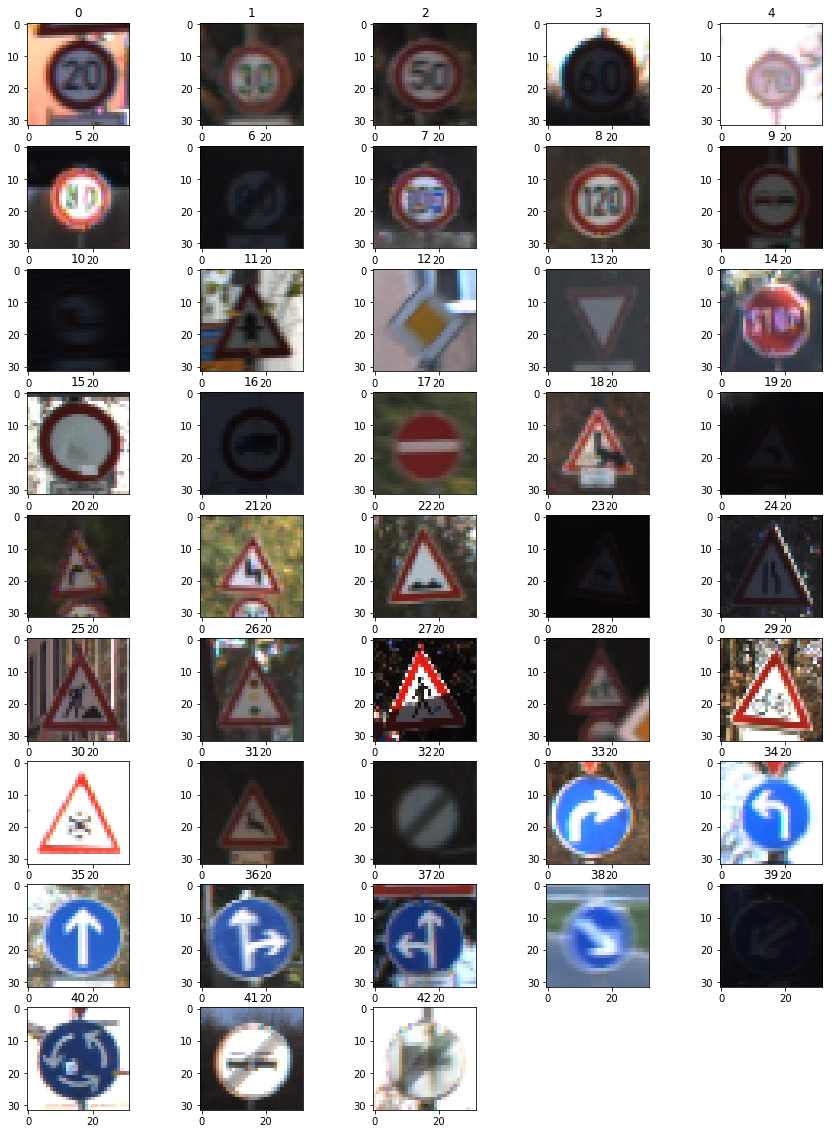

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import math

# Visualizations will be shown in the notebook.
%matplotlib inline

def showimg(img_label):
    for i in range(5000):
        temp_id = np.random.randint(0, len(y_test))
        if y_test[temp_id] == img_label:
            return temp_id
            break
        else:
            pass

fig = plt.figure(figsize=(15, 20))
for i in range(43):
    temp_index = showimg(i)
    exec('ax' + str(i+1) +'= fig.add_subplot(9,5,' + str(i+1) +')') 
    exec('ax' + str(i+1) +'.imshow(X_test[' + str(temp_index) + '])')
    exec('ax' + str(i+1) +'.set_title(' + str(i) + ')')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Show original traing set

<Container object of 43 artists>

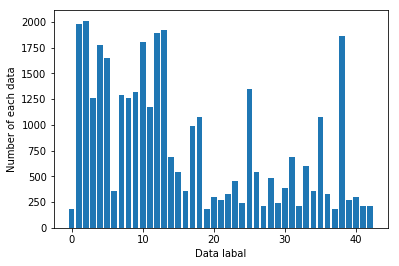

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Check data 
temp_graf_data = np.unique(y_train, return_counts=True)

left = np.array(temp_graf_data[0])
height = np.array(temp_graf_data[1])

plt.xlabel("Data labal")
plt.ylabel("Number of each data")
plt.bar(left, height,align="center")

In [5]:
import cv2

# Confirmation data structure
temp_graf_data = np.unique(y_train, return_counts=True)

print(temp_graf_data)

#Create dummy data to make each data label has similar size of training set,
#because it was comparable in original data set.
for i in temp_graf_data[0]:
    print('label' + str(i) + ':' + str(temp_graf_data[1][i]))
    print('Additional elemet:' + str(2000 - temp_graf_data[1][i]))
    if 2000 > temp_graf_data[1][i]:
        for ii in range(2000 - temp_graf_data[1][i]):
            img = showimg(i)
            ave_value = np.random.randint(2,3)
            average_square = (ave_value,ave_value)
            mod_img = cv2.blur(X_test[img], average_square)
            y_train = np.append(y_train,i)
            X_train = np.append(X_train,np.array([mod_img]),axis=0)
    else:
        pass

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8), array([ 180, 1980, 2010, 1260, 1770, 1650,  360, 1290, 1260, 1320, 1800,
       1170, 1890, 1920,  690,  540,  360,  990, 1080,  180,  300,  270,
        330,  450,  240, 1350,  540,  210,  480,  240,  390,  690,  210,
        599,  360, 1080,  330,  180, 1860,  270,  300,  210,  210]))
label0:180
Additional elemet:1820
label1:1980
Additional elemet:20
label2:2010
Additional elemet:-10
label3:1260
Additional elemet:740
label4:1770
Additional elemet:230
label5:1650
Additional elemet:350
label6:360
Additional elemet:1640
label7:1290
Additional elemet:710
label8:1260
Additional elemet:740
label9:1320
Additional elemet:680
label10:1800
Additional elemet:200
label11:1170
Additional elemet:830
label12:1890
Additional elemet:110
label13:1920
Additional elemet:80
label14:690
Additional el

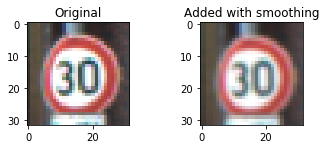

In [6]:
##Show example of conversion

ave_value = np.random.randint(2,5)
average_square = (ave_value,ave_value)
mod_img = cv2.blur(X_test[1], average_square)

fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(9,5,1)
ax1.imshow(X_test[1])
ax1.set_title("Original")
ax2 = fig.add_subplot(9,5,2)
ax2.imshow(mod_img)
ax2.set_title("Added with smoothing")
plt.show()

#Save modified data

In [7]:
with open('./traffic-signs-data/train_mod.p', 'wb') as handle:
    pickle.dump({'features':X_train,'labels':y_train}, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Load saved data as training data

In [8]:
# Load data (deserialize)
with open('./traffic-signs-data/train_mod.p', 'rb') as handle:
    unserialized_data = pickle.load(handle)
y_train = unserialized_data['labels']
X_train = (unserialized_data['features'])


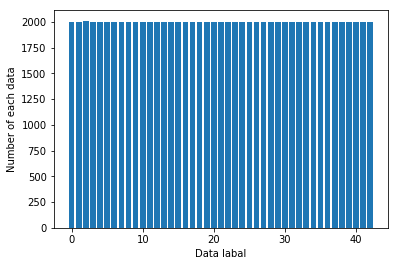

In [9]:
#Show data distribution with modified data
#Check data 
temp_graf_data = np.unique(y_train, return_counts=True)

left = np.array(temp_graf_data[0])
height = np.array(temp_graf_data[1])

plt.xlabel("Data labal")
plt.ylabel("Number of each data")
plt.bar(left, height,align="center")

#Normalization

X_test = np.array(X_test / 255.0 - 0.5 )
X_train = np.array(X_train / 255.0 - 0.5 )
X_valid = np.array(X_valid / 255.0 - 0.5 )

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def max_out(input_tensor,output_size):
    shape = input_tensor.get_shape().as_list()
    if shape[1] % output_size == 0:
        return tf.transpose(tf.reduce_max(tf.split(input_tensor,output_size,1),axis=2))
    else:
        raise ValueError("Output size or input tensor size is not fine. Please check it. Reminder need be zero.")  

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x3.   
    F_W_L0 = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 6),mean=mu, stddev=sigma))
    F_B_L0 = tf.Variable(tf.zeros(6))
    out_L0 = tf.nn.conv2d(x, F_W_L0, [1, 1, 1, 1], 'VALID') + F_B_L0
    out_L0 = tf.nn.relu(out_L0)
    
    # Layer 1: Convolutional. Input = 32x32x6. Output = 28x28x6.   
    F_W_L1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6),mean=mu, stddev=sigma))
    F_B_L1 = tf.Variable(tf.zeros(6))
    out_L1 = tf.nn.conv2d( out_L0, F_W_L1, [1, 1, 1, 1], 'VALID') + F_B_L1
    
    # Activation.
    out_L1 = tf.nn.relu(out_L1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize_L1 = [1, 2, 2, 1]
    out_L1 = tf.nn.avg_pool(out_L1, ksize_L1, [1, 2, 2, 1], 'VALID')
    dropout_L1 = tf.nn.dropout(out_L1,keep_prob)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    F_W_L2 = tf.Variable(tf.truncated_normal((5, 5, 6, 16),mean=mu, stddev=sigma))
    F_B_L2 = tf.Variable(tf.zeros(16))   
    out_L2 = tf.nn.conv2d(dropout_L1, F_W_L2, [1, 1, 1, 1], 'VALID') + F_B_L2
    
    # TODO: Activation.
    out_L2 = tf.nn.relu(out_L2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    ksize_L2 = [1, 2, 2, 1]
    out_L2 = tf.nn.avg_pool(out_L2, ksize_L1, [1, 2, 2, 1], 'VALID')    
    dropout_L2 = tf.nn.dropout(out_L2,keep_prob)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    out_L2 =  flatten(dropout_L2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W_fc1 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    B_fc1 = tf.Variable(tf.zeros(120))
    out_L2 = tf.matmul(out_L2, W_fc1) + B_fc1
        
    # TODO: Activation.
    out_L2 = tf.nn.relu(out_L2)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W_fc2 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    B_fc2 = tf.Variable(tf.zeros(84))
    out_L3 = tf.matmul(out_L2, W_fc2) + B_fc2
    dropout_L3 = tf.nn.dropout(out_L3,keep_prob)
    
    # TODO: Activation.
    out_L3 = tf.nn.relu(dropout_L3)

    # TODO: Layer 4: Fully Connected. Input = 84. Output = 60.
    W_fc3 = tf.Variable(tf.truncated_normal(shape=(84, 60), mean = mu, stddev = sigma))
    B_fc3 = tf.Variable(tf.zeros(60))
    out_L4 = tf.matmul(out_L3, W_fc3) + B_fc3
    dropout_L4 = tf.nn.dropout(out_L4,keep_prob)
    
#     # TODO: Activation.
    out_L4 = tf.nn.relu(dropout_L4)
        
    # TODO: Layer 5: Fully Connected. Input = 60. Output = 43.
    W_fc4 = tf.Variable(tf.truncated_normal(shape=(60, 43), mean = mu, stddev = sigma))
    B_fc4 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(out_L4, W_fc4) + B_fc4
    top_k_op = tf.nn.top_k(logits, k=3)

    return logits

In [11]:
tf.reset_default_graph()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [40]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

#learning rate
rate = 0.001
EPOCHS = 40
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6})            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        train_accuracy = evaluate(X_train, y_train)
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
()
EPOCH 1 ...
Validation Accuracy = 0.569
Train Accuracy = 0.707
Test Accuracy = 0.603
EPOCH 2 ...
Validation Accuracy = 0.750
Train Accuracy = 0.856
Test Accuracy = 0.777
EPOCH 3 ...
Validation Accuracy = 0.813
Train Accuracy = 0.899
Test Accuracy = 0.853
EPOCH 4 ...
Validation Accuracy = 0.861
Train Accuracy = 0.935
Test Accuracy = 0.899
EPOCH 5 ...
Validation Accuracy = 0.868
Train Accuracy = 0.948
Test Accuracy = 0.924
EPOCH 6 ...
Validation Accuracy = 0.889
Train Accuracy = 0.963
Test Accuracy = 0.943
EPOCH 7 ...
Validation Accuracy = 0.903
Train Accuracy = 0.966
Test Accuracy = 0.943
EPOCH 8 ...
Validation Accuracy = 0.909
Train Accuracy = 0.969
Test Accuracy = 0.954
EPOCH 9 ...
Validation Accuracy = 0.919
Train Accuracy = 0.976
Test Accuracy = 0.962
EPOCH 10 ...
Validation Accuracy = 0.917
Train Accuracy = 0.976
Test Accuracy = 0.959
EPOCH 11 ...
Validation Accuracy = 0.919
Train Accuracy = 0.979
Test Accuracy = 0.964
EPOCH 12 ...
Validation Accuracy = 0.930
Train A

In [41]:
##Test data accuracy

#Predict
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    logits_data = sess.run(logits, feed_dict={x: X_test, y: y_test, keep_prob:1.0})

prediction_array = np.empty(0)
for i in range(len(logits_data)):
    prediction = np.argmax(logits_data[i])
    prediction_array = np.append(prediction_array,prediction)

accuracy_scor = 0
for i in zip(prediction_array,y_test):
    if i[0] == i[1]:
        accuracy_scor += 1
    else:
        pass

print("Prediction accuracy:" + str(float(accuracy_scor/float(len(prediction_array))*100)) + "% with test data set")

INFO:tensorflow:Restoring parameters from ./lenet
Prediction accuracy:98.0443388757% with test data set


In [42]:
##Traing data accuracy

#Predict
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    logits_data = sess.run(logits, feed_dict={x: X_train, y: y_train, keep_prob:1.0})
    
prediction_array = np.empty(0)
for i in range(len(logits_data)):
    prediction = np.argmax(logits_data[i])
    prediction_array = np.append(prediction_array,prediction)

accuracy_scor = 0
for i in zip(prediction_array,y_train):
    if i[0] == i[1]:
        accuracy_scor += 1
    else:
        pass

print("Prediction accuracy:" + str(float(accuracy_scor/float(len(prediction_array))*100)) + "% with test data set")

INFO:tensorflow:Restoring parameters from ./lenet
Prediction accuracy:99.4884315777% with test data set


In [43]:
##Validation data accuracy

#Predict
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    logits_data = sess.run(logits, feed_dict={x: X_valid, y: y_valid, keep_prob:1.0})

prediction_array = np.empty(0)
for i in range(len(logits_data)):
    prediction = np.argmax(logits_data[i])
    prediction_array = np.append(prediction_array,prediction)

accuracy_scor = 0
for i in zip(prediction_array,y_valid):
    if i[0] == i[1]:
        accuracy_scor += 1
    else:
        pass

print("Prediction accuracy:" + str(float(accuracy_scor/float(len(prediction_array))*100)) + "% with test data set")

INFO:tensorflow:Restoring parameters from ./lenet
Prediction accuracy:94.5124716553% with test data set


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

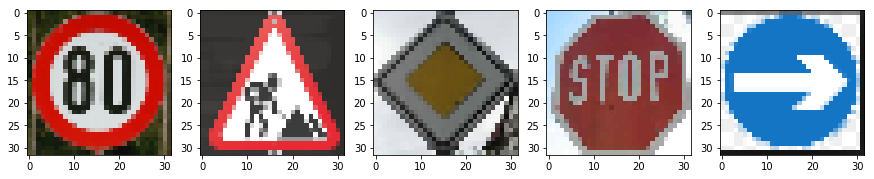

In [14]:
import cv2

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
fig = plt.figure(figsize=(15, 20))
cv2.COLOR_RGB2BGR
for i in range(5):
    exec('temp_img' + str(i+1) + '=cv2.cvtColor(cv2.imread("./images_f_web/Photo' + str(i+1) + '.PNG"),cv2.COLOR_RGB2BGR)')
    exec('temp_img' + str(i+1) + '= cv2.resize(temp_img' + str(i+1) + ',(32, 32))')
    exec('ax' + str(i+1) + ' = fig.add_subplot(1,5,' + str(i+1) + ')')
    exec('ax' + str(i+1) + '.imshow(temp_img' + str(i+1) + ')')
plt.show()

### Predict the Sign Type for Each Image

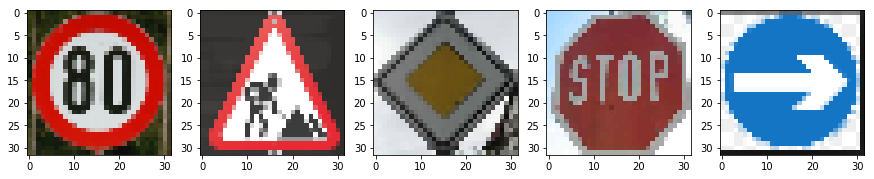

INFO:tensorflow:Restoring parameters from ./lenet
Correct label:5 Prediction:5
Correct label:25 Prediction:25
Correct label:12 Prediction:12
Correct label:14 Prediction:14
Correct label:38 Prediction:34


In [48]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#load varidation data
X_traing_org5 = []
for i in range(5):
    exec('temp_img' + str(i+1) + '= cv2.cvtColor(cv2.imread("./images_f_web/Photo' + str(i+1) + '.PNG"),cv2.COLOR_RGB2BGR)')
    exec('temp_img' + str(i+1) + '= cv2.resize(temp_img' + str(i+1) + ',(32, 32))')
    exec('X_traing_org5.append(temp_img' + str(i+1) +')')

X_traing_org5 = np.asarray(X_traing_org5)

#Correct data label
y_traing_org5 = np.array([5,25,12,14,38])

fig = plt.figure(figsize=(15, 20))
for i in range(5):
    exec('ax' + str(i+1) + ' = fig.add_subplot(1,5,' + str(i+1) + ')')
    exec('ax' + str(i+1) + '.imshow(X_traing_org5[' + str(i) + '])')
plt.show()

X_traing_org5 = np.array(X_traing_org5 / 255.0 - 0.5)

#Predict
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    logits_data = sess.run(logits, feed_dict={x: X_traing_org5, y: y_traing_org5, keep_prob:1.0})


prediction_array = np.empty(0)
for i in range(len(logits_data)):
    prediction = np.argmax(logits_data[i])
    prediction_array = np.append(prediction_array,prediction)
    print("Correct label:" +str(y_traing_org5[i]) + " Prediction:" + str(prediction))

### Analyze Performance

In [49]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy_scor = 0
for i in zip(prediction_array,y_traing_org5):
    if i[0] == i[1]:
        accuracy_scor += 1
    else:
        pass

print("Prediction accuracy:" + str(int(accuracy_scor/float(len(prediction_array))*100)) + "% with my data set")

Prediction accuracy:80% with my data set


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [50]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    logits_data = sess.run( logits, feed_dict={x: X_traing_org5, y: y_traing_org5, keep_prob:1.0})
    
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

tf.global_variables_initializer()
for i in range(len(logits_data)):
    with tf.Session() as sess:
        print("Label:",y_traing_org5[i],"top_3_op:",sess.run(tf.nn.top_k(tf.constant(softmax(logits_data[i])), k=5)))

INFO:tensorflow:Restoring parameters from ./lenet
('Label:', 5, 'top_3_op:', TopKV2(values=array([ 0.65202457,  0.12257142,  0.08611555,  0.07932093,  0.03761377], dtype=float32), indices=array([5, 2, 1, 3, 7], dtype=int32)))
('Label:', 25, 'top_3_op:', TopKV2(values=array([  9.99983191e-01,   1.24307735e-05,   1.35941525e-06,
         1.32240552e-06,   1.17827585e-06], dtype=float32), indices=array([25, 29, 38, 11, 28], dtype=int32)))
('Label:', 12, 'top_3_op:', TopKV2(values=array([  1.00000000e+00,   1.55073865e-09,   1.04339293e-09,
         2.79280071e-10,   2.00622990e-10], dtype=float32), indices=array([12, 33, 34, 14,  1], dtype=int32)))
('Label:', 14, 'top_3_op:', TopKV2(values=array([  9.93659317e-01,   3.48080788e-03,   2.21758801e-03,
         3.51668830e-04,   1.96280496e-04], dtype=float32), indices=array([14, 13, 17, 25, 12], dtype=int32)))
('Label:', 38, 'top_3_op:', TopKV2(values=array([  9.99342978e-01,   3.84452054e-04,   2.27366865e-04,
         3.07646260e-05,   1.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.